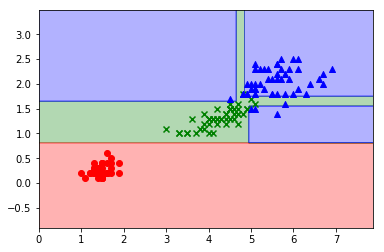

In [5]:
#決策樹
#好解釋的分類器
#用不同的門檻值切分變數

#以最大化資訊增益值為目標  (已經不是用成本函數來衡量了)
# "節點"

#IG(Dp)=I(Dp)−NleftNpI(Dleft)−NrightNpI(Dright)
#母節點的資訊增益值-左邊子節點的資訊增益值-右邊子節點的資訊增益值

#決策樹（5）
#             A
#          母節點
#         (40, 40)
#  (30, 10)      (10, 30)
#  左子節點       右子節點        (如果把左40當成一類，右40當成另外一類。其實A分類器分得不好 : 因為沒有把左邊或右邊任何一類分乾淨)

#             B
#          母節點
#         (40, 40)
#  (20, 40)      (20, 0)
#  左子節點       右子節點        (如果把左40當成一類，右40當成另外一類。其實B分類器分得不錯 : 因為把左右邊那一類分得很乾淨)




#decision_tree.py

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# 決策區域圖
def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('o', 'x', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

iris = datasets.load_iris()
X = iris.data[:, 2:] # 花瓣長度與花瓣寬度
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)    #參數max_depth調得越高，越容易出現over fitting
tree.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = tree)
plt.show()





#Logistic Regression 調 lambda(alpha)
#SVM 調 gamma
#決策樹 調 max_depth   decision boundary : 用哪一個變數的門檻值去分類，可以讓資訊增益值最大，我就用這個值當作decision boundary
#決策樹沒有θ^T x
#K最近鄰沒有θ^T x
#那些參數調得越高，越容易出現over fitting

#以 http://yaojenkuo.io/python_4_ds/ch12.slides.html#/6/8 的圖來說
#門檻值就是紅色直的切下來一刀、藍的橫切一刀、藍的直切一刀



#如果X的feature很多，不只是兩個的話，那就沒有辦法用視覺化的方式呈現decision boundary，就只能用accuracy來判斷這個模型表現好不好




In [ ]:
#分群問題（6）
#K-means 分群方法的成本函數
#c:分群的索引值
#c:分群的索引值
#μk:不同分群的中心點
#μk:不同分群的中心點
#μc:計算距離後收斂的不同分群中心點
#μc:計算距離後收斂的不同分群中心點
#minimize:J(c,μk)=1m∑i=1m(xi−μc)2

#分群問題（7）
#K-means 演算的方式

#K-means會迭代!!
#圖(B) : 一開始 "隨便" 放兩個XX
#圖(C) : 距離紅XX較近的綠色點都漆成紅色，距離藍XX較近的綠色點都漆成藍色
#圖(D) : 把目前紅色的中心點當作新的紅XX，把目前藍色的中心點當作新的藍XX，然後迭代，一直做下去
#K-means 分群方法的成本函數    minimize:J(c,μk)=1m∑i=1m(xi−μc)2



#分群問題（8）
#初始 K 個中心點的位置對結果有決定性的影響
#那怎麼解決? 就一開始的"隨便" 放兩個XX有這麼決定性影響的話，那就"一開始"的那個流程多做幾次阿，多跑幾次結果，最後再挑成本最小的那個
#亦即分群問題（9）
#透過多進行幾次初始化 K 個中心點的位置來進行校正
#從多次的分群中選擇一個 J(c,μk)J(c,μk) 最小的分群

#分群問題（10）
#如何選擇一個合適的 K？

#性別（2 群）
#血型（4 群）
#星座（12 群）
#出生月日（366 群）
#DNA（75+ 億群）

#我要分群(內差異小、組間差異大) ， 同時又要節省成本
#每次我有n筆資料，你把資料分成n群，當然是最符合內差異小、組間差異大。 但我也很不滿意阿，這樣哪有省到成本，還要找你來分群幹嘛

#那怎麼挑要分成幾類呢?
#找邊際效益開始銳減那附近的Elbow point(不至於到邊際效益為負的地方)     利用陡坡圖（Scree plot）尋找手肘點（Elbow point）
#肘點(指由坡度變為較平緩的轉折點)




In [ ]:
#Kaggle 機器學習競賽（3）
#流程：
#步驟 	內容
#第一步	暸解資料外觀與內容
#第二步	資料預處理
#第三步	分類器
#第四步	預測、模型評估
#第五步	應用預測資料
#第六步	上傳


#暸解資料外觀與內容


#做好資料預處理 (feature engineering / pre-processing)
# 1. 填補遺漏值 : Embarked, Age
# 2. 把類別變數化成dummy variables  (類別標籤編碼轉換（使用 One-hot encoding） :  Sex,  Embarked)
#確定training data沒有遺漏值


#選定分類器


#module建立好，
#做好test data資料預處理，再確定test data沒有遺漏值


#那就去預測吧!
#然後要把資料整理好，符合kaggle要求的格式

#第一次上傳吧!

In [10]:
#kaggle競賽
#第一步	暸解資料外觀與內容



import pandas as pd

train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
train.head()
# print(train.isnull())  #做遺漏值判斷
# print(train.isnull().sum())  #加總起來就知道遺漏值有幾個


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


0    468
1    109
Name: Survived, dtype: int64


1    233
0     81
Name: Survived, dtype: int64


因為本來男生女生的乘客數量就不一樣，所以改看比例
0    0.811092
1    0.188908
Name: Survived, dtype: float64


0    0.257962
1    0.742038
Name: Survived, dtype: float64




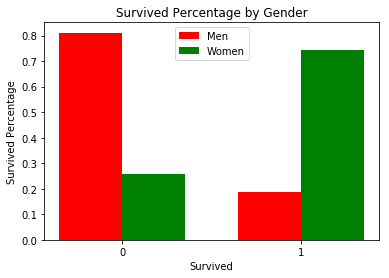

In [20]:
#性別 : 男性 VS 女性 的存活比例

print(train.Survived[train.Sex == 'male'].value_counts())
print("\n")
print(train.Survived[train.Sex == 'female'].value_counts())
print("\n")


print("因為本來男生女生的乘客數量就不一樣，所以改看比例")

print(train.Survived[train.Sex == 'male'].value_counts(normalize =True))
print("\n")
print(train.Survived[train.Sex == 'female'].value_counts(normalize =True, sort = False))
print("\n")





import numpy as np
import matplotlib.pyplot as plt

def bar_plotting(lst_1, lst_2, group_1, group_2):
    N = len(lst_1)
    ind = np.arange(N)
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, lst_1, width, color='r')
    rects2 = ax.bar(ind + width, lst_2, width, color='g')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels((0, 1))
    ax.set_xlabel("Survived")
    ax.set_ylabel('Survived Percentage')
    ax.legend((rects1[0], rects2[0]), (group_1, group_2))

male_survived = list(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
female_survived = list(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))
bar_plotting(male_survived, female_survived, 'Men', 'Women')
plt.title('Survived Percentage by Gender')
plt.show()

0    0.460177
1    0.539823
Name: Survived, dtype: float64


0    0.623377
1    0.376623
Name: Survived, dtype: float64




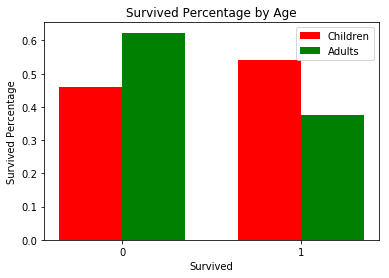

In [23]:
#年紀 : 小孩(<18) VS 成人(>=18) 的存活比例

child = pd.Series(np.empty(train.shape[0]))
train.Child = child
age_filter_under_18 = train.Age < 18
age_filter_above_18 = train.Age >= 18
train.Child[age_filter_under_18] = 1
train.Child[age_filter_above_18] = 0
print(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
print("\n")
print(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))
print("\n")



child_survived = list(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
adult_survived = list(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))

bar_plotting(child_survived, adult_survived, 'Children', 'Adults')
plt.title('Survived Percentage by Age')
plt.show()

In [ ]:
#模擬一下決策樹分類器，怎麼分這891筆資料? 怎麼分誰會死亡，誰不會死亡?
#看一個變數 : 性別sex  --> 看到女性-分成1 會存活這一類，看到男性-分成0 會死亡這一類
#看一個變數 : 年紀     --> 看到小孩-分成1 會存活這一類，看到成人-分成0 會死亡這一類
#那如果今天有測試資料 : 又是男性又是成人 --> 八九不離十，分類器會分成0 會死亡這一類

In [27]:
#第二步	資料預處理


#資料預處理 (feature engineering / pre-processing)

#   (這一項其實不太算是預處理)  X 不要納入編號（PassengerId, Ticket）、姓名（Name）與遺漏值過多的變數（Cabin） : 沒辦法把這些拿去預測Y
# 1. 填補遺漏值 : Embarked, Age
# 2. 把類別變數化成dummy variables  (類別標籤編碼轉換（使用 One-hot encoding） :  Sex,  Embarked)

#-------------------------------------------------------------------------------------------------------------


# 1. 填補遺漏值 : Embarked, Age

# Embarked 的遺漏值都以 "S" 填補
train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
print(train.Embarked.value_counts())
most_embarked = train.Embarked.value_counts().index[0]
train.Embarked = train.Embarked.fillna(most_embarked)
print(sum(train.Embarked.isnull()))


# Age 的遺漏值以中位數填補
age_median = train.Age.median()
train.Age = train.Age.fillna(age_median)
print(sum(train.Age.isnull()))

# train.isnull().sum()     填補遺漏值之後先來確認是否還有沒填補到的










# 2. 把類別變數化成dummy variables  (類別標籤編碼轉換（使用 One-hot encoding） :  Sex,  Embarked)


# 使用 one-hot encoding 進行類別標籤編碼轉換
train_sex_embarked_dummies = pd.get_dummies(train.loc[:, ["Sex", "Embarked"]])
train_sex_embarked_ohe = train_sex_embarked_dummies.values.astype(float)  #透過.values先換成ndarray，因為後面都要ndarray跑計算
train_sex_embarked_dummies.head()




S    644
C    168
Q     77
Name: Embarked, dtype: int64
0
0


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [29]:
#第三步	分類器


#分類器
#決策樹分類器




from sklearn import tree

# 整理 features 跟 target
train_features = np.hstack((train.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, train_sex_embarked_ohe))
target = train.Survived.values

# 建立模型
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87)
tree_clf.fit(train_features, target)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=87, splitter='best')

In [30]:
#第四步	預測、模型評估


#預測、模型評估




print(tree_clf.feature_importances_)
print(tree_clf.score(train_features, target))

[ 0.08141882  0.29239577  0.02738117  0.01737284  0.30813586  0.23919358
  0.          0.02053509  0.00339779  0.01016907]
0.979797979798


In [34]:
#第五步	應用預測資料



#應用預測資料



test_url = "https://storage.googleapis.com/py_ml_datasets/test.csv"
test = pd.read_csv(test_url)
test.head(3)


#少了變數Y嘛，就是少了存活與否的那個變數



print(test.shape)
print(test.dtypes)



print(test.isnull().sum())
#再檢查test data的遺漏值
#Age             86
#Fare             1
#Cabin          327


# Age 的遺漏值以中位數填補
age_median = test.Age.median()
test.Age = test.Age.fillna(age_median)
print(sum(test.Age.isnull()))

# Fare 的遺漏值以平均數填補
fare_median = test.Fare.median()
test.Fare = test.Fare.fillna(fare_median)
print(sum(test.Fare.isnull()))

# 使用 one-hot encoding 進行類別標籤編碼轉換
test_sex_embarked_dummies = pd.get_dummies(test.loc[:, ["Sex", "Embarked"]])
test_sex_embarked_ohe = test_sex_embarked_dummies.values.astype(float)
test_sex_embarked_dummies.head()


# 整理 test_features
test_features = np.hstack((test.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, test_sex_embarked_ohe))

# 預估
predictions = tree_clf.predict(test_features)
print(predictions)

(418, 11)
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
0
0
[0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 

In [36]:
#第六步	上傳





#module建立好，

#做好資料預處理 (feature engineering / pre-processing)
# 1. 填補遺漏值 : Embarked, Age
# 2. 把類別變數化成dummy variables  (類別標籤編碼轉換（使用 One-hot encoding） :  Sex,  Embarked)

#確定沒有遺漏值

#那就去預測吧!
#然後要把資料整理好，符合kaggle要求的格式

#第一次上傳吧!
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
print(my_solution.head())
print(my_solution.shape)
my_solution.to_csv("my_first_solution.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         0
895         1
896         1
(418, 1)


In [ ]:
#第二次嘗試

#這次調整分類器裡面的參數(Parameter)

#分類器
#設定決策樹的參數：
#max_depth                  (max_depth第一次採用預設，預設值是大到把你資料分類分乾淨為止)
#min_samples_split          (至少幾個觀測值以上，才能做門檻切分) 

#調 max_depth,  min_samples_split -->都是為了不要過度配適 over fitting   



#再作一次prediction，就上傳    (因為就像在做實驗，一次只調整一個變因，這次調整分類器裡面的參數(Parameter))

In [ ]:
#第三次嘗試

#這次調變數(Feature)，新增了一個變數family_size



#資料預處理
#將 SibSp 與 Parch 相加再加 1（自己）成為 family_size

#那在training data做資料預處理，多了變數family_size
#同樣tset data 也要做資料預處理，新增變數family_size


#再作一次prediction，就上傳    (因為就像在做實驗，一次只調整一個變因，這次調變數(Feature)，新增了一個變數family_size)

In [ ]:
#第四次嘗試

#整體學習
#將數個分類器的預測結果綜合考慮


#前題 : 以一題是非題來說!!!!!!!!!!!!!!!!!!!
#以一題是非題來說，假如我們使用一個銅板來決定答案要填是還是非，答對的機率是 50%
#使用兩個銅板來決定答案，答對的機率是 1−(50%)^2=75%1−(50%)2=75%，如果銅板的數目來到 5 枚，答對的機率是 1−(50%)^5=96.875%



#training data長這樣  :  (891, 12)        891筆資料，(11個變數 + 1個想要預測的那個變數)

            
#        11    np.random.randint(1, 11, size = n)
#     _______
#     |     |     
#     |     |   891    np.random.randint(1, 891, size = m)
#     |     |
#     -------


#random forest : random在m個觀測值，n個feature

# 用(m1, n1), 藉此來建立第一棵決策樹tree(1st)，其中m1<=891, n1<=11
# 用(m2, n2), 藉此來建立第一棵決策樹tree(2nd)，其中m2<=891, n2<=11
#..........


#             xi  
#tree(1st)    0
#tree(2nd)    1         -->假設結果總共有 "0" : 51個， "1" : 49個
#...         ...
#tree(100)    1






In [ ]:
#調整方向:
#*Parameter : lambda(alpha) , n_estimators , gamma , ...
#*Features  : meaningful features    (多數時間都在feature engineering : 填補遺漏值 、 dummy variables)
#*Model     : SVM , RF , LR , ... 

In [ ]:
#電信公司很流行 
# churn model -  0 : stay
#                1 : churn(6個月後non-buy) 或(np)

#現實生活中不像kaggle一樣可以對答案，適有過去資料可以對阿，但生活中以這個為例，就真的要等6個月後才能印證我這模型做得準不準

先在上面調成Markdown而不是code模式

## Titanic


In [ ]:
#網站  dribble         -->做profolio!!

#網站 github  -->可以作profolio!管理，因為他可以直接秀jupyter notebook的內容
#ipynb


#reveal.js     (以ml_intro.ipynb這個檔案為例)
#在資料夾下指令 jupyter nbtconvert --to slides ml_intro.ipynb --reveal-prefix=reveal.js
#open




#網路搜尋jupyter nbtconvert

In [ ]:
#Career
#data analyst     中等
#     engineering 程式中要
#     scientist   數學重要


#研究所的話 : 可以念computer science (CS) 再找裡面的data science (DS)組

In [ ]:
#是不是作數據分析只分成兩塊
#變數是

#數值         或 類別

#迴歸(正規化) 或 分類器